In [69]:
import numpy as np
import cv2

array([[[66, 56, 49],
        [66, 56, 49],
        [66, 56, 49],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [74, 74, 74]],

       [[66, 56, 49],
        [66, 56, 49],
        [66, 56, 49],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [67, 67, 67]],

       [[65, 55, 48],
        [65, 55, 48],
        [65, 55, 48],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [68, 68, 68]],

       ...,

       [[34, 28, 33],
        [20, 14, 19],
        [ 4,  0,  3],
        ...,
        [ 5,  7,  1],
        [ 6,  8,  2],
        [55, 57, 51]],

       [[26, 29, 20],
        [ 2,  4,  0],
        [13, 14, 12],
        ...,
        [15, 14, 10],
        [ 2,  1,  0],
        [12, 11,  7]],

       [[31, 34, 25],
        [48, 50, 44],
        [63, 64, 62],
        ...,
        [36, 35, 31],
        [53, 52, 48],
        [30, 29, 25]]], dtype=uint8)
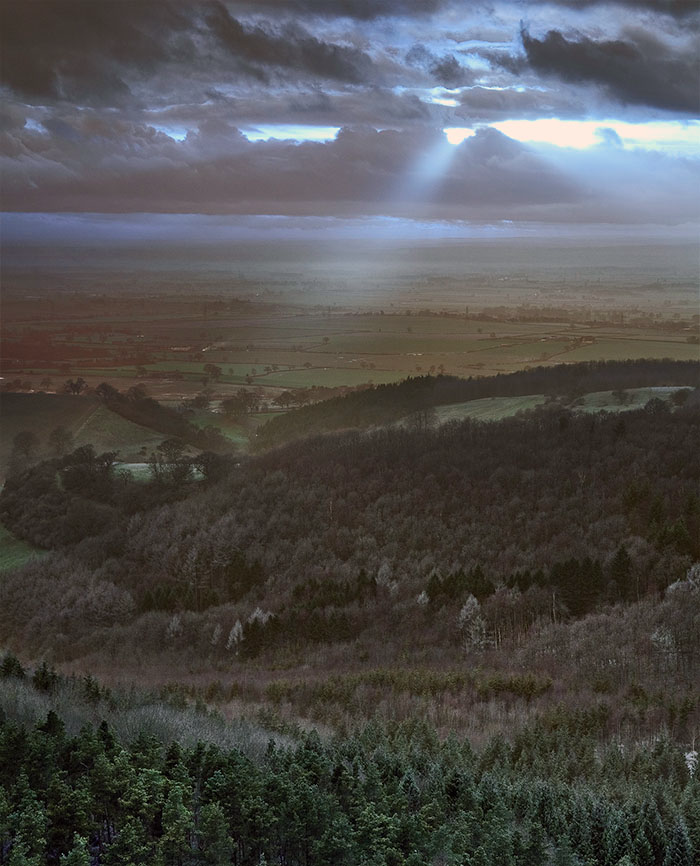

In [70]:
image = cv2.imread('/content/image.jpg')
output_image = np.zeros(image.shape)
image

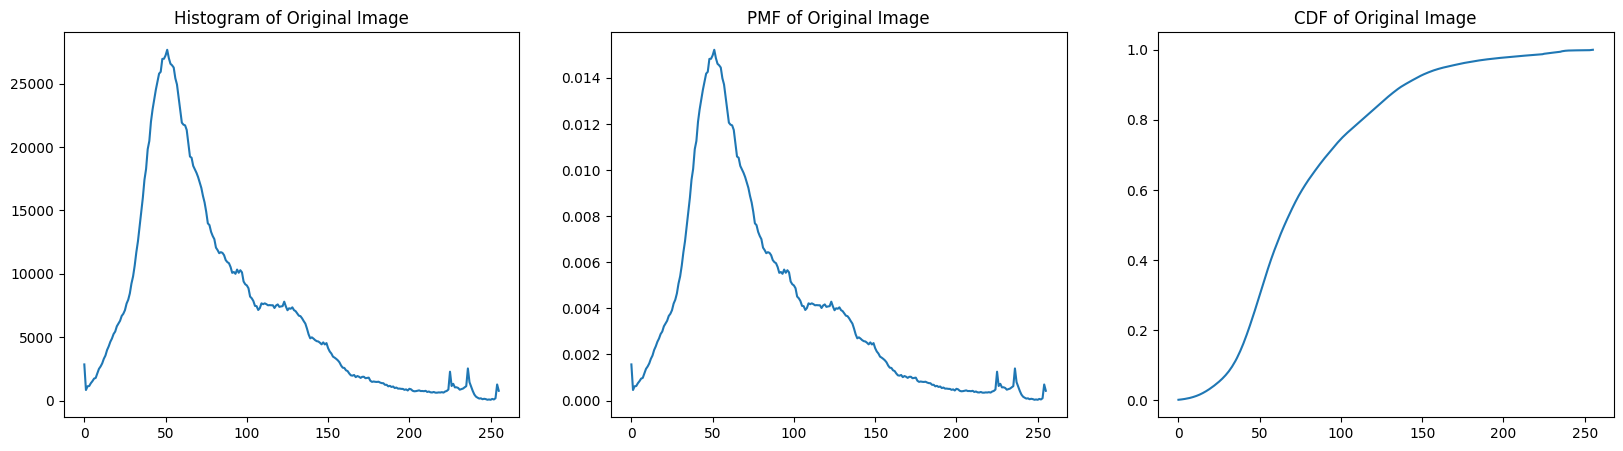

In [71]:
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
hist, bins = np.histogram(image.flatten(), 256, [0, 256])
plt.plot(hist)
plt.title('Histogram of Original Image')

plt.subplot(1,3,2)
pmf = hist / np.sum(hist)
plt.plot(pmf)
plt.title('PMF of Original Image')

plt.subplot(1,3,3)
cdf = pmf.cumsum()
plt.plot(cdf)
plt.title('CDF of Original Image')

plt.show()

In [72]:
def get_pixel_frequency(image):
    pixel_frequency = np.zeros(256)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel_value =image[row, col].astype(int)
            pixel_frequency[pixel_value] += 1
    return pixel_frequency

In [73]:
L=256
pixel_frequency = get_pixel_frequency(image)
pixel_pdf = pixel_frequency / np.sum(pixel_frequency)
pixel_cumsum = np.cumsum(pixel_pdf)
bits_cumsum = (L-1) * pixel_cumsum
pixel_map  = np.round(bits_cumsum).astype(int)

In [74]:
for row in range(output_image.shape[0]):
    for col in range(output_image.shape[1]):
      pixel_val = image[row, col]
      output_image[row, col] = pixel_map[pixel_val]

In [75]:
output_image = output_image.astype(int)

In [76]:
output_image

array([[[130,  99,  73],
        [130,  99,  73],
        [130,  99,  73],
        ...,
        [143, 143, 143],
        [145, 145, 145],
        [149, 149, 149]],

       [[130,  99,  73],
        [130,  99,  73],
        [130,  99,  73],
        ...,
        [125, 125, 125],
        [127, 127, 127],
        [133, 133, 133]],

       [[127,  96,  69],
        [127,  96,  69],
        [127,  96,  69],
        ...,
        [125, 125, 125],
        [127, 127, 127],
        [135, 135, 135]],

       ...,

       [[ 26,  17,  24],
        [  9,   4,   8],
        [  1,   0,   1],
        ...,
        [  1,   2,   0],
        [  1,   2,   1],
        [ 96, 103,  81]],

       [[ 14,  18,   9],
        [  1,   1,   0],
        [  4,   4,   3],
        ...,
        [  5,   4,   3],
        [  1,   0,   0],
        [  3,   3,   2]],

       [[ 21,  26,  13],
        [ 69,  77,  54],
        [122, 125, 119],
        ...,
        [ 30,  28,  21],
        [ 88,  85,  69],
        [ 19,  18,  13]]

Text(0.5, 1.0, 'High Contrast Image')

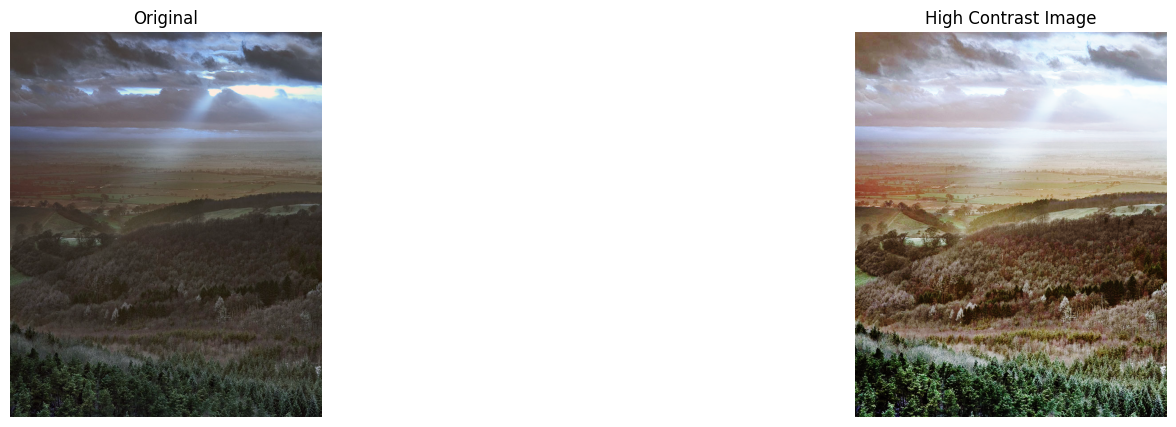

In [77]:
fig=plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(output_image)
plt.axis('off')
plt.title('High Contrast Image')

In [78]:
L = 256
output_image2 = np.zeros(output_image.shape)
pixel_frequency = get_pixel_frequency(output_image)
pixel_pdf = pixel_frequency / np.sum(pixel_frequency)
pixel_cumsum = np.cumsum(pixel_pdf)
bits_cumsum = (L-1) * pixel_cumsum
pixel_map = np.round(bits_cumsum).astype(int)

for row in range(output_image2.shape[0]):
    for col in range(output_image2.shape[1]):
        pixel_val = output_image[row, col].astype(int)
        output_image2[row, col] = pixel_map[pixel_val]

output_image2 = output_image2.astype(int)

Text(0.5, 1.0, 'High Contrast Image')

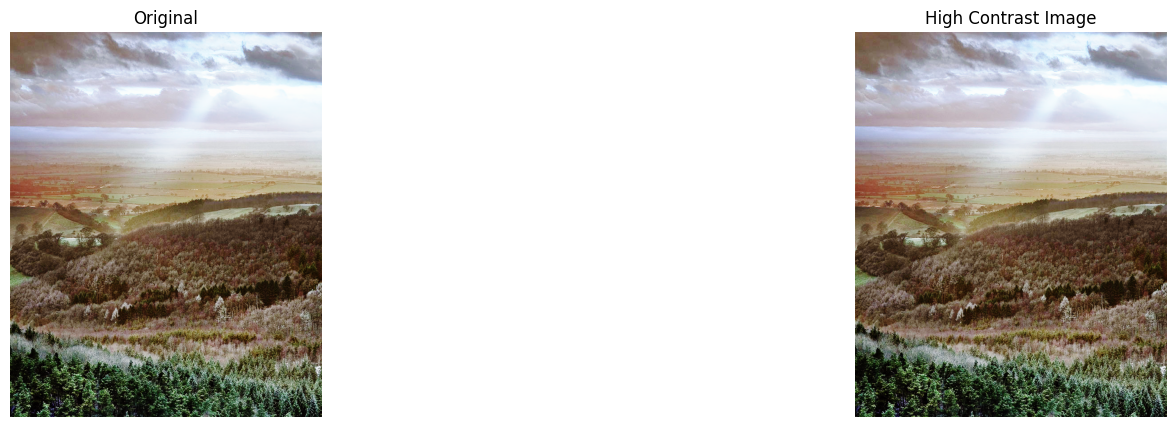

In [79]:
fig=plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.imshow(output_image)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(output_image2)
plt.axis('off')
plt.title('High Contrast Image')

#MNIST Fashion Dataset Image

In [80]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [81]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

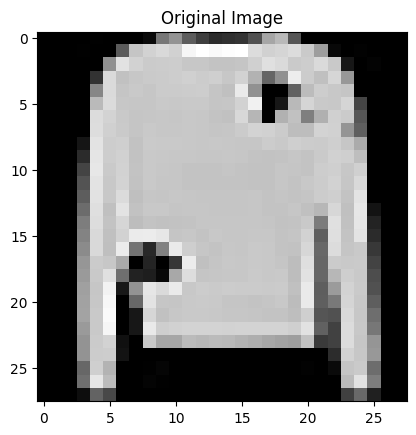

In [82]:
import random
random_index = random.randint(0, len(x_train) - 1)
image_new = x_train[random_index]
output_image_new = np.zeros(image_new.shape)
plt.imshow(image_new, cmap='gray')
plt.title('Original Image')
plt.show()

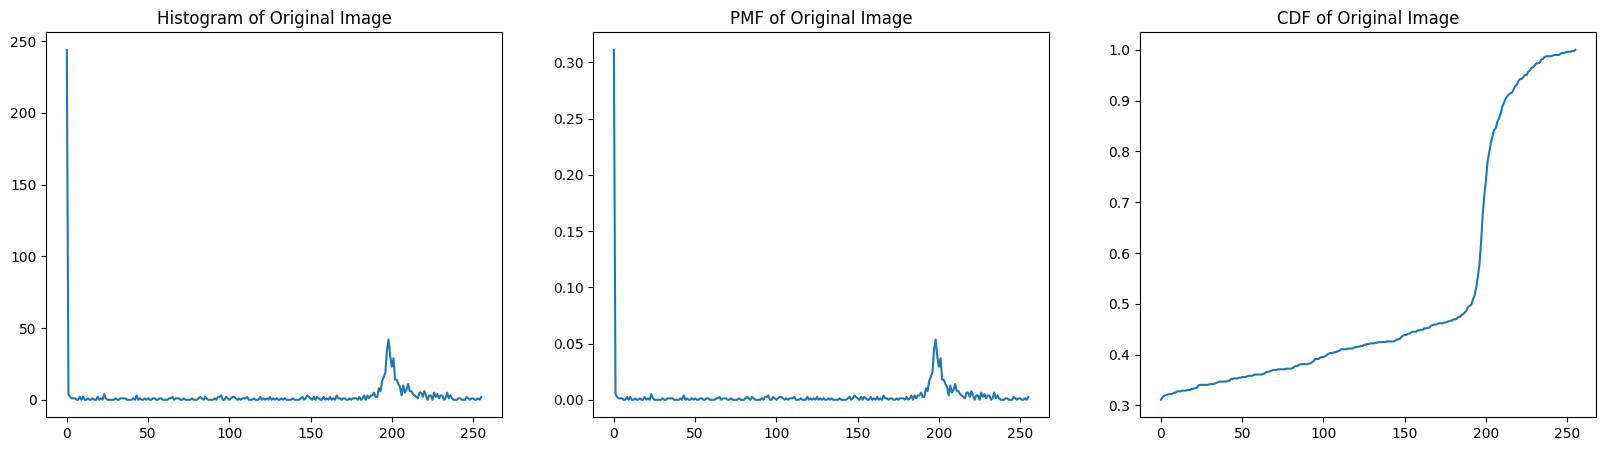

In [83]:
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
hist, bins = np.histogram(image_new.flatten(), 256, [0, 256])
plt.plot(hist)
plt.title('Histogram of Original Image')

plt.subplot(1,3,2)
pmf = hist / np.sum(hist)
plt.plot(pmf)
plt.title('PMF of Original Image')

plt.subplot(1,3,3)
cdf = pmf.cumsum()
plt.plot(cdf)
plt.title('CDF of Original Image')

plt.show()

In [84]:
L=256
pixel_frequency = get_pixel_frequency(image_new)
pixel_pdf = pixel_frequency / np.sum(pixel_frequency)
pixel_cumsum = np.cumsum(pixel_pdf)
bits_cumsum = (L-1) * pixel_cumsum
pixel_map  = np.round(bits_cumsum).astype(int)

for row in range(output_image_new.shape[0]):
    for col in range(output_image_new.shape[1]):
        pixel_val = image_new[row, col].astype(int)
        output_image_new[row, col] = pixel_map[pixel_val]

output_image_new = output_image_new.astype(int)

Text(0.5, 1.0, 'High Contrast Image')

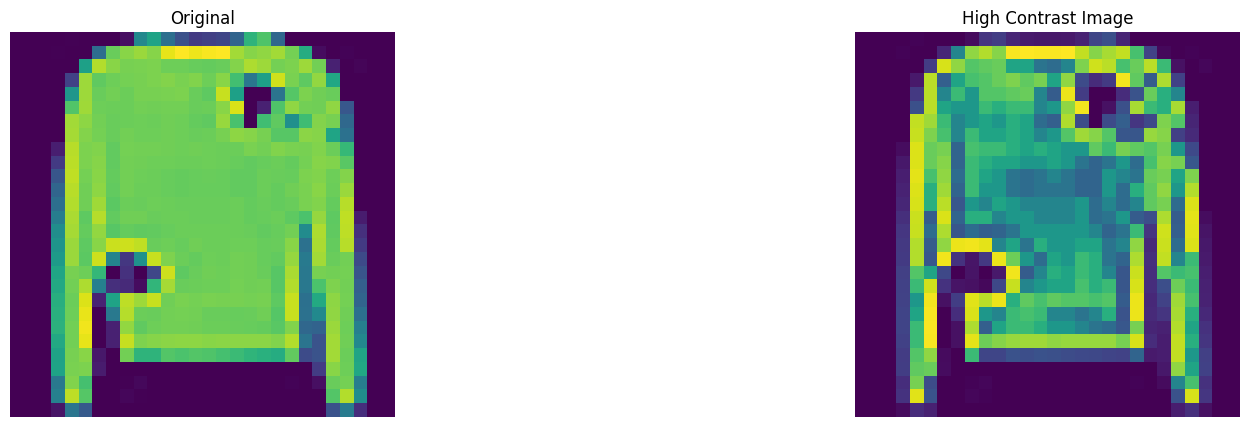

In [85]:
fig=plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.imshow(image_new)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(output_image_new)
plt.axis('off')
plt.title('High Contrast Image')